<a href="https://colab.research.google.com/github/mansipatel2508/Stock-Price-Prediction-Time-Series-with-NN/blob/master/Stock_Price_Prediction_Time_Series_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Stock Price Prediction using NN,LSTM & CNN
The project predicts the closing stock price based on the last 7 days' data includes opening stock price, highest stock price of the day, lowest stock price of the day, stock volume and closing stock price.
# 1.Problem Statement
This project aims handle the sequential data of stock market, predicting the closing stock pride every 7 days calculating previously sequential values into account towards predicting the every 7th record in the sequential dataset.

**Time Series Dataset | Closing Stock Price Prediction | Sequential Data as Image Representation | Regression Chart**

Models : Fully-Connected Neural Networks (FCNN) | Convolutional Neural Networks (CNN) | Long Short Term Memory (LSTM)

Project attemps to learn:
* Applying and comparing FCNN,CNN & LSTM to Time series data
* Visualizing the output feature - closing stock prices
* Visualizing sequential data to 4D image to feed in the CNN model
* Visualizing sequential data to 3D image to feed in the LSTM model
* Parameter tuning all the models to get the best results
* Regression Chart or Lift Chart
* Previous N days' best value
* Applying Bi-directional LSTM model 
* Applying best models got for totally another sequential dataset - google company's stock prediction

# 2. Dataset
The dataset has following 7 features:
Date, Open, High, Low, Close, Adj_Close, Volume

* Removed date and adj_close columns, not using them for prediction
* Preprocessed the data, dropped the rows with null values, unnecessary columns
* Normalized numeric data with zscore normalization
* Normalized the output features as seperate column while used the same which fed as train_y and y_true

In [0]:
df.dtypes

Date         object 
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume       int64  
dtype: object

#Data Visualization
* The flow of value of closing stock price which we intend to predict

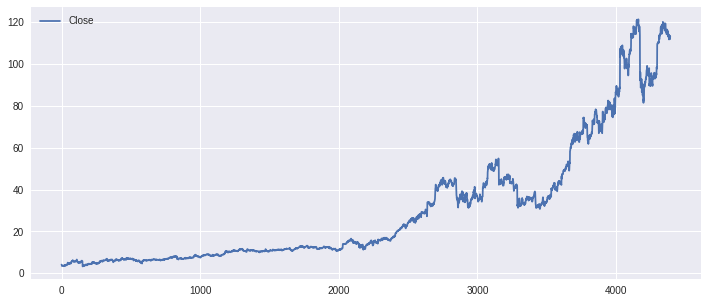

In [0]:
df['Close'].plot(legend=True, figsize=(12,5))

# Neural Models

## FCNN

In [0]:
#loading the best saved model
from keras.models import load_model
model1 = load_model(os.path.join(save_path,"neural_project4_12.hdf5"))
pred1 = model1.predict(x_test01)
print (pred1.shape)
# Measure RMSE error.  RMSE is common for regression.
fcnn = np.sqrt(metrics.mean_squared_error(pred1,y_test01))
print("After load score (RMSE): {}".format(fcnn))
fcnnr2=metrics.r2_score(pred1,y_test01)
print ("R2 score:",fcnnr2)

(1318, 1)
After load score (RMSE): 0.3785302937030792
R2 score: 0.9998432358445976


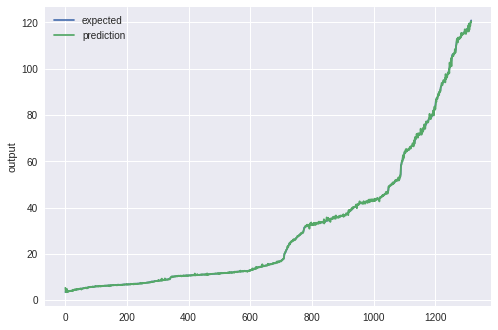

In [0]:
pred = [x for [x] in pred1]
chart_regression(pred,y_test01)

## LSTM

In [0]:
#loading the best saved model
from keras.models import load_model
model1 = load_model(os.path.join(save_path,"lstm_neural_project4_11.hdf5"))
pred1 = model1.predict(x_test)
print (pred1.shape)
# Measure RMSE error.  RMSE is common for regression.
lstm = np.sqrt(metrics.mean_squared_error(pred1,y_test))
print("Predicted classes:",pred1[0:10])
print("Expected classes:",y_test[0:10])
print("After load score (RMSE): {}".format(lstm))
lstmr2=metrics.r2_score(pred1,y_test)
print ("R2 score:",lstmr2)
#chart_regression(pred1[0:1],y_test01)

(1310, 1)
Predicted classes: [[50.14902 ]
 [50.028023]
 [50.36313 ]
 [50.54165 ]
 [50.44294 ]
 [50.405506]
 [50.64058 ]
 [50.955437]
 [51.20983 ]
 [51.27947 ]]
Expected classes: [51.075 50.74  50.91  50.59  51.65  52.105 51.975 52.22  50.96  51.67 ]
After load score (RMSE): 3.006859064102173
R2 score: 0.9889063399028939


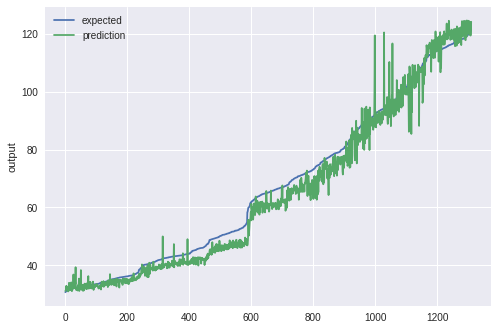

In [0]:
pred = [x for [x] in pred1]
chart_regression(pred,y_test)

## CNN

In [0]:
#loading the best saved model
from keras.models import load_model
model1 = load_model(os.path.join(save_path,"cnn_project4_b1.hdf5"))
pred1 = model1.predict(x_test1)
print (pred1.shape)
# Measure RMSE error.  RMSE is common for regression.
cnns = np.sqrt(metrics.mean_squared_error(pred1,y_test1))
print("Predicted classes:",pred1[0:10])
print("Expected classes:",y_test1[0:10])
print("After load score (RMSE): {}".format(cnns))
cnnr2=metrics.r2_score(pred1,y_test)
print ("R2 score:",cnnr2)
#chart_regression(pred1[0:1],y_test01)

(1310, 1)
Predicted classes: [[50.595318]
 [50.902718]
 [50.638836]
 [50.931206]
 [50.6201  ]
 [51.178085]
 [51.51366 ]
 [51.498405]
 [51.59022 ]
 [51.589233]]
Expected classes: [51.075 50.74  50.91  50.59  51.65  52.105 51.975 52.22  50.96  51.67 ]
After load score (RMSE): 1.8140490055084229
R2 score: 0.9955348187206736


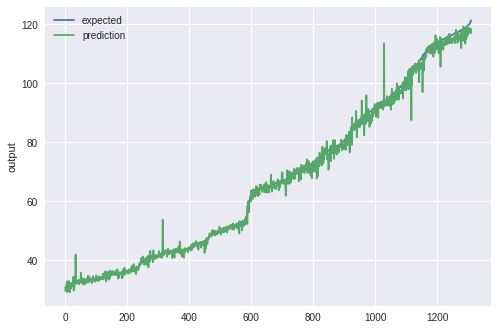

In [0]:
pred = [x for [x] in pred1]
chart_regression(pred,y_test1)

#Comparison

Text(0, 0.5, 'RMSE')

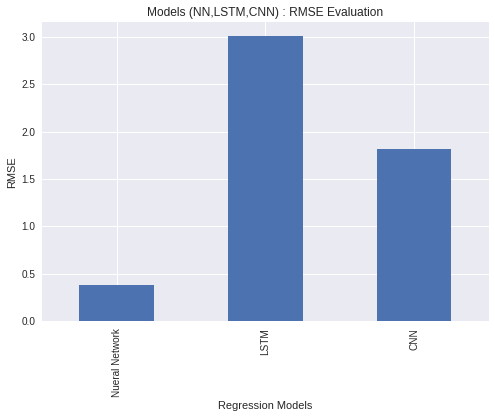

In [0]:
my_plot2 = y_label.plot(kind='bar',legend=None,title="Models (NN,LSTM,CNN) : RMSE Evaluation",)
my_plot2.set_xlabel("Regression Models")
my_plot2.set_ylabel("RMSE")

#1.Best value of N

##LSTM
* Created a function and gave a range while ran it several times to observe the best value for N previous days for prediction

Text(0, 0.5, 'Error Rate')

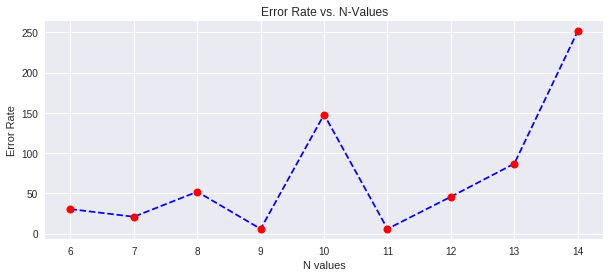

In [0]:
plt.figure(figsize=(10,4))
plt.plot(range(6,15), RMSE1, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. N-Values')
plt.xlabel('N values')
plt.ylabel('Error Rate')

## CNN
* Created a function and gave a range while ran it several times to observe the best value for N previous days for prediction

Text(0, 0.5, 'Error Rate')

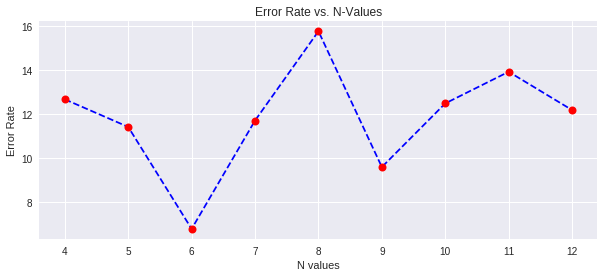

In [0]:
plt.figure(figsize=(10,4))
plt.plot(range(4,13), RMSE2, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. N-Values')
plt.xlabel('N values')
plt.ylabel('Error Rate')

# 2.Bidirectional LSTM Model
* Tried with different layers and parameter tuning but end up with more RMSE than the regular LSTM
* Observed that the less layers has relatively less RMSE than the deep layer Bidirectional LSTM
* Did not work for this problem

RMSE : LSTM - 3.006859064102173  **|** Bidirectional LSTM -  4.965034008026123

# 3.Best Models applying to different dataset (Google)

* Prior performing best FCNN,CNN & LSTM models applying for another dataset to observe the results  

## RMSE

FCNN - 4.5739

LSTM -  52.1711

CNN - 18.1740

#Conclusion
* Different dataset may have different time series flow causes applying different models on that particular dataset, not the best models for likewise dataset.
* Bidirectional LSTM should have worked well with time series although the performance increases by minor error rate, need to observe more combinations with it.
* As we considering previous N days' data to predict the next closing stock value for CNN & LSTM, same approach should have been applied to FCNN to get the fair result, although in this project FCNN beats the others from the first place.

Mini Project 4

Mansi Patel

March 27, 2019

Prof: H.Chen

CSC 215 